# Tools 1 Final Project

Jen Lee, Isaac Burmingham, & Dan Saubert

**Insert Dataset and motivation slide (1 points)**
- How/why the dataset was collected and a description of the metadata of your dataset.

**Insert Actual task definition/research question (2 points)**
- What real-world problem are you trying to solve? What are the input and output of your 

**Insert Literature review (2 points)**
- What other work has been done in this area, and how is your work novel compared to others?

In [1]:
!pip3 -q install pickle5
!pip3 -q install pandas
!pip3 -q install matplotlib
!pip3 -q install seaborn
!pip3 -q install numpy
!pip3 -q install wordcloud
!pip3 -q install sklearn
!pip3 -q install nltk

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You sh

## Data Gathering

In [2]:
from os import path

dataFileName = "./pklData/subredditData.pkl"
timeFileName = "./pklData/Times.pkl"

# if pickle file does not exist - gather data & save to pickle
if not (path.exists(dataFileName)):
    # Gets top 10 posts from a subreddit
    subreddit_List = ['socialism','Conservative','denver','DenverCirclejerk','wallstreetbets','stonks','creepypasta','EmojiPasta']
    dict_list = []
    time_dict = {}
    for subred in subreddit_List:
        start = time.time()
        for submission in reddit.subreddit(subred).top("all",limit=100):
            dat = {}
            dat["subreddit"] = subred
            dat["Post Title"] = submission.title
            dat["Post Text"] = submission.selftext
            dat["Upvotes"] = submission.score
            dat["url"] = submission.url

            # Get top 10 comments
            top_comments = list(submission.comments)
            commentList = []
            for top_level_comment in top_comments[:10]:
                commentList.append(top_level_comment.body)
                
            dat["comments"] = commentList
            dict_list.append(dat)
            
        time_dict[subred] = time.time()-start
        
        # print times to show progress
        print((time.time()-start))
    
    # create pickle file for subreddit data
    df = pd.DataFrame(dict_list)
    timeDf = pd.DataFrame(time_dict,index=[0])
    df.to_pickle(dataFileName)
    
    # create pickle file for time data
    timeDf = timeDf.transpose().reset_index().rename({'index':'Subreddit',0:'Time'},axis=1)
    timeDf.to_pickle('./pklData/Times.pkl')
    

In [3]:
import pickle5 as pickle
import pandas as pd

# import dataframe from pickle file
with open(dataFileName, "rb") as fh:
  df = pickle.load(fh)

with open(timeFileName, "rb") as fh:
  timeDf = pickle.load(fh)

# print head to show success
df.head()

,subreddit,Post Title,Post Text,Upvotes,url,comments
0,socialism,Yup,,23889,https://i.redd.it/11knxsgzcuqz.jpg,[Cropped just enough to cut off the creator!\n...
1,socialism,Unions ARE needed,,22518,https://i.redd.it/jit74yugc3n21.jpg,[Hello comrades!\n\nPlease remember that r/Soc...
2,socialism,Don’t let cops’ PR fool you. Holding signs one...,,22508,https://i.redd.it/n13yjx8izh251.jpg,"[Hello comrades,\n\nJust a reminder that r/Soc..."
3,socialism,For anyone wondering who to thank for defeatin...,,22373,https://pbs.twimg.com/media/DQ5Zi23UMAAZYWr.jpg,"[Locking, too many liberals. This is a sub for..."
4,socialism,70% of Millennials Believe U.S. Student Loan D...,,21843,https://lendedu.com/news/millennials-believe-u...,"[Hello comrades! As a friendly reminder, this ..."


In [4]:
# print time dataFrame
timeDf

,Subreddit,Time
0,socialism,212.252677
1,Conservative,290.334966
2,denver,181.710740
3,DenverCirclejerk,27.457082
4,wallstreetbets,380.326292
5,stonks,23.694517
6,creepypasta,45.983447
7,EmojiPasta,51.546786


## Data Cleaning

- Data cleaning and type conversion activity. Please share anything unusual you faced during this activity.
 - What did you do about missing values and why? Handling missing values properly is very important.
- New feature/attribute creation and data summary statistics and interpretation.


**for ML analysis to work cleaned dataframe should have columns for 'post' & 'subreddit'**

In [5]:
# TODO: Find any other bot comments that don't say "I am a bot"
known_bot_comments = ["Hello comrades! As a friendly reminder, this subreddit is a space for socialists.  If you have questions or want to debate, please consider the subs created specifically for this (/r/Socialism_101, /r/SocialismVCapitalism, /r/CapitalismVSocialism, or /r/DebateCommunism/).  You are also encouraged to use the search function to search for topics you may not be well versed in, as they may have been covered extensively before.  Acquaint yourself with the rules on the sidebar before commenting or posting. Rules are strictly enforced for non subscribers.\n\n\n- Personal attacks and harassment will not be tolerated. \n\n\n- **Bigotry, ableism and hate speech will be met with immediate bans;** socialism is an intrinsically inclusive system and we believe all people are born equal and deserve equal voices in society. \n\n- This subreddit is not for questioning the basics of socialism.  There are numerous subreddits available for those who wish to debate or learn more about socialism\n\n\n- Users are expected to at least read the discussion in a given thread before replying to it.  Obviously obtuse or asinine questions will be assumed to be trolling and will be removed and can result in a ban.\n\nNew to socialism?\n\n- Check out the **Socialism Starter Pack** - https://www.reddit.com/r/socialism/wiki/index/starterpack\n\nThank you!\n\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/socialism) if you have any questions or concerns.*",
                     "Hello comrades!\n\nPlease remember that r/Socialism is **a community for socialists** and therefore a certain knowledge on said socio-political doctrine is expected from participants. \n\n**Please take a minute to familiarize with our rules** (you can find them on our sidebar) as they still apply if you come from r/All.\n\nNew to socialism? Feel free to check out the educational materials on our sidebar or head over to r/Socialism_101. Looking for like-minded subs? Check out the lists on our sidebar!\n\n---\n\nRelated content:\n\n- 📖 [Trade Unions in the Age of Imperialist Decay](https://www.marxists.org/archive/trotsky/1940/xx/tu.htm), by Leon Trotsky\n\n- 📖 [On the International workingmen's Association and Karl Marx](https://www.marxists.org/reference/archive/bakunin/works/1872/karl-marx.htm), by Mikhail Bakunin\n\n- 📖 [Industrial Unionism](https://www.marxists.org/archive/debs/works/1905/industrial.htm), by Eugene V. Debs\n\n- 📖 [On syndicalism](https://theanarchistlibrary.org/library/errico-malatesta-on-syndicalism), by Errico Malatesta\n\n- 📈 [The power of Unions](https://www.reddit.com/r/socialism/comments/8c196q/the_power_of_unions_us/) (US)\n\n- 📈 [The importance of unions to fight inequality](https://www.reddit.com/r/chomsky/comments/7u34cq/union_membership_vs_inequality/)\n\nSalut!",
                     "Hello comrades,\n\nJust a reminder that r/Socialism is an anti-capitalist community **for socialists** and our rules are strictly enforced. If you are new please take a minute to familiarize with our [General Bans Policy](https://www.reddit.com/r/socialism/wiki/index/generalbans) and [Submission Guidelines](https://www.reddit.com/r/socialism/wiki/index/submissionguidelines) as they will be applied eitherway regardless of if you have or have not taken the time to read them.\n\nFurthermore, ALL comments incurring in **police apologia** will be meet with a removal AND a permanent ban. This includes liberal individualist perspectives along the lines of \"not all cops\" as, as socialists, we are opposed to the mere existence of police as an institution given that its only function is the oppression of the working class and its interests in order to protect the bourgeoise and the logic of capital.\n\nIf you are new to socialism consider visiting r/Socialism_101 instead. If your wish is to debate and/or discuss from non-socialist perspectives please head over to r/DebateAnarchism or r/DebateCommunism.\n\nRelated resources:\n\n- 📚 r/Socialism\'s [Starter Pack](https://www.reddit.com/r/socialism/wiki/index/starterpack) - [Suggested Readings](https://www.reddit.com/r/socialism/wiki/suggested_readings)\n\n- 📰 [David Whitehouse on the origins of police and its roles within capitalism](https://libcom.org/history/origins-police-david-whitehouse)\n\n- 📄 r/AllVegan\'s [Megathread on Police](https://www.reddit.com/r/allvegan/comments/fu7zd3/acab_compilationmegaarchivecollection_a_helpful/)\n\n- 🎥 [The Communal Defense Committee: An Alternative to Police (Rojava Excerpt)](https://www.youtube.com/watch?v=ojXxz1u1R4c&feature=emb_title)\n\n- 📄 [Law enforcement in Zapatista-Run Chiapas (Mexico)](https://anarchyinaction.org/index.php?title=Zapatista-run_Chiapas#Crime)"]

def removeBotComments(comments):
    clean_comments = []
    for c in comments:
        if "I am a bot" not in c \
        and c != '[removed]' \
        and c != '[deleted]'\
        and c not in known_bot_comments:
            clean_comments.append(c)
    
    # Append '' to the rest of the comments array to keep it's length at 10
    for i in range(len(clean_comments), 10):
        clean_comments.append('')
    
    return clean_comments

df["clean_comments"] = df["comments"].apply(lambda x: removeBotComments(x))

# change so each comment has their own column
df[["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"]] = pd.DataFrame(df.clean_comments.tolist())
df.head()

,subreddit,Post Title,Post Text,Upvotes,url,comments,clean_comments,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,socialism,Yup,,23889,https://i.redd.it/11knxsgzcuqz.jpg,[Cropped just enough to cut off the creator!\n...,[Cropped just enough to cut off the creator!\n...,Cropped just enough to cut off the creator!\nh...,Am I the only one who thought that the footbal...,"I agree with the message here, but isn't a bit...",People forget the whole protesting isn't again...,There's still slavery in the world. If you own...,This shows two things:\n\nBad: it's not gone ...,,,,
1,socialism,Unions ARE needed,,22518,https://i.redd.it/jit74yugc3n21.jpg,[Hello comrades!\n\nPlease remember that r/Soc...,[Asked my boss today why I was lied to about m...,Asked my boss today why I was lied to about my...,"The boss makes a dollar, I make a dime, and th...",">Unions ARE needed\n\nCEO: ""dunno, i don't see...",Union worker here. I get nearly double what si...,Man (possible Union member) pointing to a sign...,"I don't understand anti-union people, no matte...",😂 What’s a pension? .... 😭,,,
2,socialism,Don’t let cops’ PR fool you. Holding signs one...,,22508,https://i.redd.it/n13yjx8izh251.jpg,"[Hello comrades,\n\nJust a reminder that r/Soc...",[I’m seeing so many “both sides” arguments on ...,I’m seeing so many “both sides” arguments on s...,The bootlicking going on on this site and acro...,Description: two pictures; one on the left two...,This is why the LGBT community says no cops at...,I haaaated everyone trying to be all “take a k...,Both sides arguments can suck my nut\n\nFuck a...,/r/copaganda and /r/2020PoliceBrutality are my...,"This happened in reverse in austin, shooting p...",,
3,socialism,For anyone wondering who to thank for defeatin...,,22373,https://pbs.twimg.com/media/DQ5Zi23UMAAZYWr.jpg,"[Locking, too many liberals. This is a sub for...","[Locking, too many liberals. This is a sub for...","Locking, too many liberals. This is a sub for ...","\nAccording to this exit polls, whether or not...","Like no black women did a write in, which is i...",As a black man it makes me happy that black pe...,How the fuck can someone go and vote for an op...,\nWe appreciate the 50.5% of you that did the ...,He wasn’t open about anything. He completely e...,All this despite aggressive voter repression t...,63% of white women supported a sex predator an...,
4,socialism,70% of Millennials Believe U.S. Student Loan D...,,21843,https://lendedu.com/news/millennials-believe-u...,"[Hello comrades! As a friendly reminder, this ...","[Great, now the Mellenials are ruining the war...","Great, now the Mellenials are ruining the war ...",They are right. The US is eating itself from t...,Notice how every baby boomer benefitted from n...,That makes sense. I dont imagine many millenni...,I think that number will be higher in 4-6 year...,I can think of at least 1 gen X'er who feels t...,This just in: people think the thing that dire...,"Oh no, at some point anti-socialist propaganda...","NK barely has any food, my Student Loan debt w...",


Map classes:

In [6]:
import numpy as np

# convert classes (subreddit) to integers 
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['subreddit']))}

# print class_mapping
class_mapping

{'Conservative': 0,
 'DenverCirclejerk': 1,
 'EmojiPasta': 2,
 'creepypasta': 3,
 'denver': 4,
 'socialism': 5,
 'stonks': 6,
 'wallstreetbets': 7}

In [7]:
# use class_mapping to create new column
df['class_mapping'] = df['subreddit'].map(class_mapping)

# Print head to show success
df.head()

,subreddit,Post Title,Post Text,Upvotes,url,comments,clean_comments,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,class_mapping
0,socialism,Yup,,23889,https://i.redd.it/11knxsgzcuqz.jpg,[Cropped just enough to cut off the creator!\n...,[Cropped just enough to cut off the creator!\n...,Cropped just enough to cut off the creator!\nh...,Am I the only one who thought that the footbal...,"I agree with the message here, but isn't a bit...",People forget the whole protesting isn't again...,There's still slavery in the world. If you own...,This shows two things:\n\nBad: it's not gone ...,,,,,5
1,socialism,Unions ARE needed,,22518,https://i.redd.it/jit74yugc3n21.jpg,[Hello comrades!\n\nPlease remember that r/Soc...,[Asked my boss today why I was lied to about m...,Asked my boss today why I was lied to about my...,"The boss makes a dollar, I make a dime, and th...",">Unions ARE needed\n\nCEO: ""dunno, i don't see...",Union worker here. I get nearly double what si...,Man (possible Union member) pointing to a sign...,"I don't understand anti-union people, no matte...",😂 What’s a pension? .... 😭,,,,5
2,socialism,Don’t let cops’ PR fool you. Holding signs one...,,22508,https://i.redd.it/n13yjx8izh251.jpg,"[Hello comrades,\n\nJust a reminder that r/Soc...",[I’m seeing so many “both sides” arguments on ...,I’m seeing so many “both sides” arguments on s...,The bootlicking going on on this site and acro...,Description: two pictures; one on the left two...,This is why the LGBT community says no cops at...,I haaaated everyone trying to be all “take a k...,Both sides arguments can suck my nut\n\nFuck a...,/r/copaganda and /r/2020PoliceBrutality are my...,"This happened in reverse in austin, shooting p...",,,5
3,socialism,For anyone wondering who to thank for defeatin...,,22373,https://pbs.twimg.com/media/DQ5Zi23UMAAZYWr.jpg,"[Locking, too many liberals. This is a sub for...","[Locking, too many liberals. This is a sub for...","Locking, too many liberals. This is a sub for ...","\nAccording to this exit polls, whether or not...","Like no black women did a write in, which is i...",As a black man it makes me happy that black pe...,How the fuck can someone go and vote for an op...,\nWe appreciate the 50.5% of you that did the ...,He wasn’t open about anything. He completely e...,All this despite aggressive voter repression t...,63% of white women supported a sex predator an...,,5
4,socialism,70% of Millennials Believe U.S. Student Loan D...,,21843,https://lendedu.com/news/millennials-believe-u...,"[Hello comrades! As a friendly reminder, this ...","[Great, now the Mellenials are ruining the war...","Great, now the Mellenials are ruining the war ...",They are right. The US is eating itself from t...,Notice how every baby boomer benefitted from n...,That makes sense. I dont imagine many millenni...,I think that number will be higher in 4-6 year...,I can think of at least 1 gen X'er who feels t...,This just in: people think the thing that dire...,"Oh no, at some point anti-socialist propaganda...","NK barely has any food, my Student Loan debt w...",,5


## Exploritory Data Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

### Plot time that it took to pull data from each subreddit

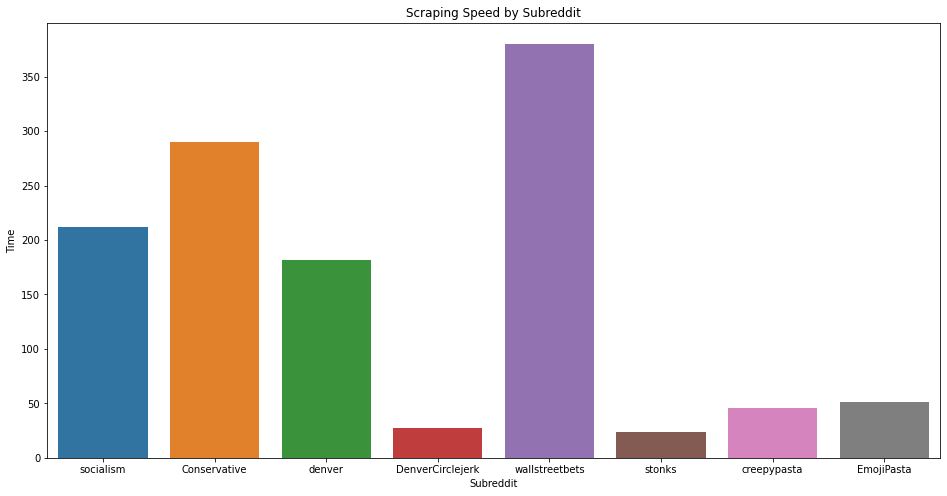

In [9]:
plt.figure(figsize=(16,8))
sns.barplot(x='Subreddit',y='Time',data=timeDf);
plt.title('Scraping Speed by Subreddit');

### Plot Average Number of Words are in Post Title per Subreddit

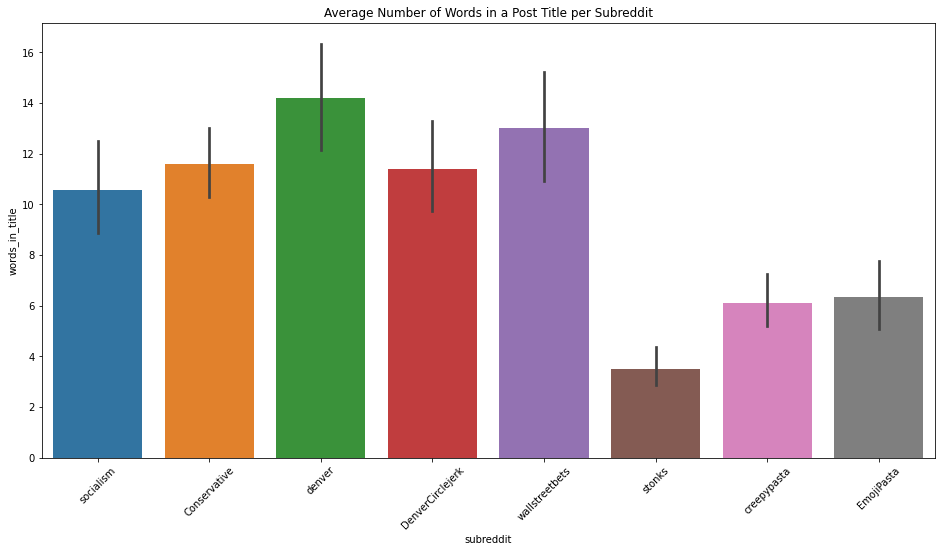

In [10]:
subs = set(df.subreddit.unique())

df["words_in_title"] = df['Post Title'].str.split(' ').apply(len)

for subr in list(subs):
    d_slice = df[['subreddit','words_in_title']]
    words_df = d_slice.groupby(by='subreddit').mean().reset_index()
    
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
plt.title("Average Number of Words in a Post Title per Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Average Number of Words in a Post Title")
sns.barplot(x='subreddit',y='words_in_title',data=df)
plt.show()

### Distribution of Number of Words found in Title Plot

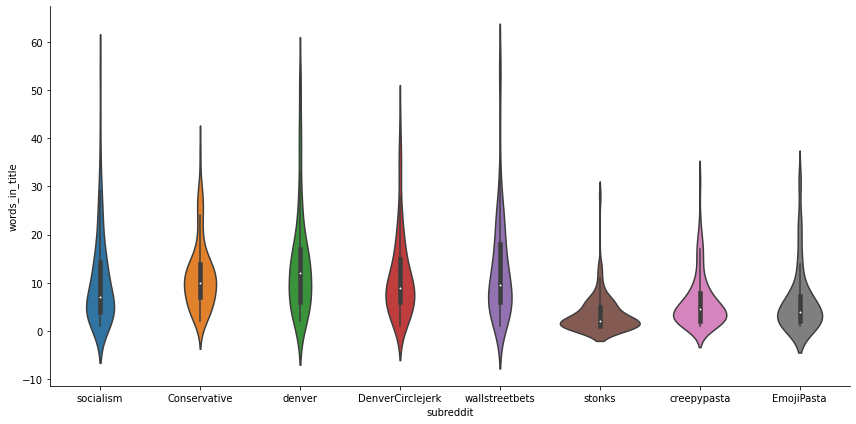

In [11]:
sns.catplot(x='subreddit',y='words_in_title',kind='violin',data=df,height=6,aspect=2);

### Average number of Upvotes in each Subreddit

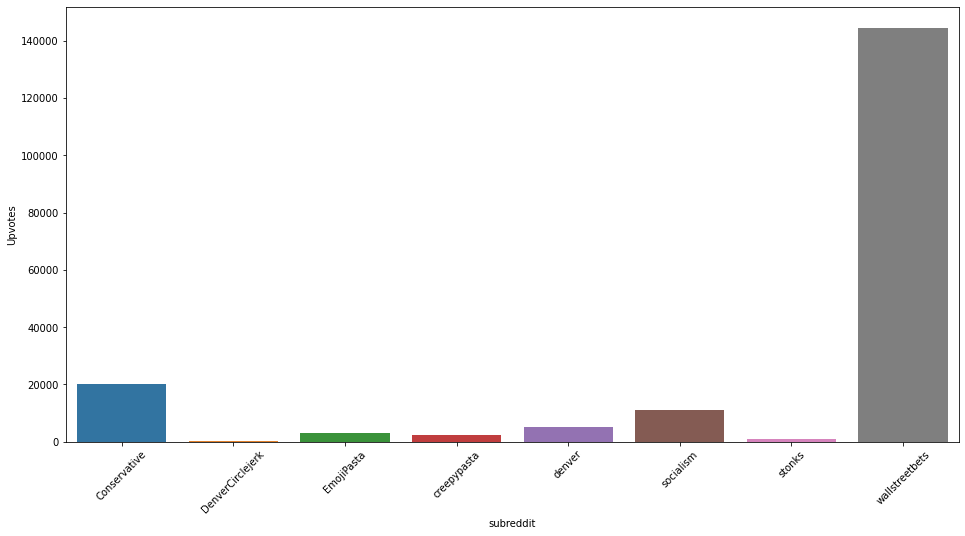

In [12]:
upv = df.groupby(by='subreddit').mean('Upvotes').reset_index()

plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.barplot(x='subreddit',y='Upvotes',data=upv)
plt.show()

In [13]:
from wordcloud import WordCloud

def lumpText(text_array):
    lump = ""
    for i in text_array:
        for j in i:
            lump += j + " "
    return lump

subreddits = [['Conservative', 'socialism'], 
              ['DenverCirclejerk', 'denver'], 
              ['EmojiPasta', 'creepypasta'], 
              ['stonks', 'wallstreetbets']]

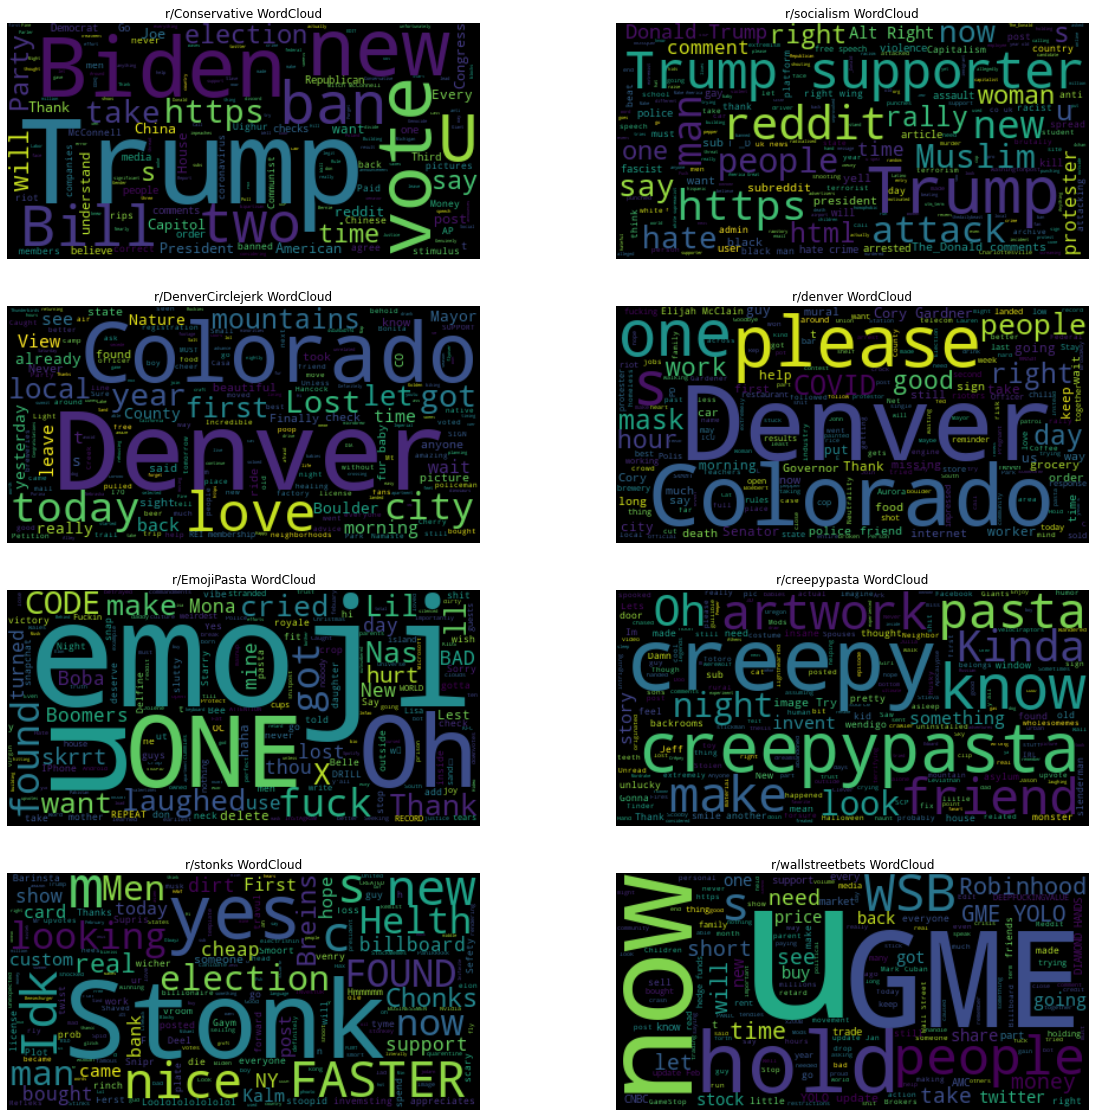

In [14]:
# Note: can add `max_font_size=40` to display more words

# ['Conservative', 'socialism']
conservative_text = lumpText(df.loc[df["subreddit"] == "Conservative"][["Post Title", "Post Text"]].values)
conservative_wordcloud = WordCloud().generate(conservative_text)

socialism_text = lumpText(df.loc[df["subreddit"] == "socialism"][["Post Title", "Post Text"]].values)
socialism_wordcloud = WordCloud().generate(socialism_text)

# ['DenverCirclejerk', 'denver']
denverCirclejerk_text = lumpText(df.loc[df["subreddit"] == "DenverCirclejerk"][["Post Title", "Post Text"]].values)
denverCirclejerk_wordcloud = WordCloud().generate(denverCirclejerk_text)

denver_text = lumpText(df.loc[df["subreddit"] == "denver"][["Post Title", "Post Text"]].values)
denver_wordcloud = WordCloud().generate(denver_text)

# ['EmojiPasta', 'creepypasta']
emojiPasta_text = lumpText(df.loc[df["subreddit"] == "EmojiPasta"][["Post Title", "Post Text"]].values)
emojiPasta_wordcloud = WordCloud().generate(emojiPasta_text)

creepypasta_text = lumpText(df.loc[df["subreddit"] == "creepypasta"][["Post Title", "Post Text"]].values)
creepypasta_wordcloud = WordCloud().generate(creepypasta_text)

# ['stonks', 'wallstreetbets']
stonks_text = lumpText(df.loc[df["subreddit"] == "stonks"][["Post Title", "Post Text"]].values)
stonks_wordcloud = WordCloud().generate(stonks_text)

wallstreetbets_text = lumpText(df.loc[df["subreddit"] == "wallstreetbets"][["Post Title", "Post Text"]].values)
wallstreetbets_wordcloud = WordCloud().generate(wallstreetbets_text)

fig,ax=plt.subplots(4, 2, figsize=(20,20),num=1)

# display the generated wordclouds
ax[0][0].imshow(conservative_wordcloud, interpolation="bilinear")
ax[0][0].set_title("r/Conservative WordCloud")
ax[0][0].axis("off")

ax[0][1].imshow(socialism_wordcloud, interpolation="bilinear")
ax[0][1].set_title("r/socialism WordCloud")
ax[0][1].axis("off")

ax[1][0].imshow(denverCirclejerk_wordcloud, interpolation="bilinear")
ax[1][0].set_title("r/DenverCirclejerk WordCloud")
ax[1][0].axis("off")

ax[1][1].imshow(denver_wordcloud, interpolation="bilinear")
ax[1][1].set_title("r/denver WordCloud")
ax[1][1].axis("off")

ax[2][0].imshow(emojiPasta_wordcloud, interpolation="bilinear")
ax[2][0].set_title("r/EmojiPasta WordCloud")
ax[2][0].axis("off")

ax[2][1].imshow(creepypasta_wordcloud, interpolation="bilinear")
ax[2][1].set_title("r/creepypasta WordCloud")
ax[2][1].axis("off")

ax[3][0].imshow(stonks_wordcloud, interpolation="bilinear")
ax[3][0].set_title("r/stonks WordCloud")
ax[3][0].axis("off")

ax[3][1].imshow(wallstreetbets_wordcloud, interpolation="bilinear")
ax[3][1].set_title("r/wallstreetbets WordCloud")
ax[3][1].axis("off")

plt.show()

## Analysis

Apply TfidfVectorizer to text columns:

Test Train Split:

In [15]:
from sklearn.model_selection import train_test_split

def get_test_train_split(dataFrame):
    X = dataFrame[["Post Title", "Post Text", "c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"]].values
    y = dataFrame["class_mapping"].values
    
    X_train, X_test, y_train, y_test =\
        train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)
    
    return X_train, X_test, y_train, y_test


Create functions required to tokenize:

In [16]:
from nltk.stem.porter import PorterStemmer
import re

porter = PorterStemmer()

def tokenizer(text):
        # since passing in an array, neet to lump together all the words
        tokenized = []
        if type(text) == np.ndarray:
            for t in text:
                t = re.sub('<[^>]*>', '', t)
    
                emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           t.lower())
                t = re.sub('[\W]+', ' ', t.lower()) \
                       + ' '.join(emoticons).replace('-', '')
                tokenized += [w for w in t.split() if w not in stop]
        else:        
            text = re.sub('<[^>]*>', '', text)
    
            emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text.lower())
            text = re.sub('[\W]+', ' ', text.lower()) \
                   + ' '.join(emoticons).replace('-', '')
            tokenized = [w for w in text.split() if w not in stop]

        return tokenized

def tokenizer_porter(text):
    if type(text) == np.ndarray:
        for t in text:
            t = re.sub('<[^>]*>', '', t)
    
            emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                               t.lower())
            t = re.sub('[\W]+', ' ', t.lower()) \
                       + ' '.join(emoticons).replace('-', '')
    
            tokenized += [porter.stem(word) for word in t.split()]
    else: 
        text = re.sub('<[^>]*>', '', text)
    
        emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text.lower())
        text = re.sub('[\W]+', ' ', text.lower()) \
                       + ' '.join(emoticons).replace('-', '')
    
        tokenized = [porter.stem(word) for word in text.split()]

    return tokenized

Construct a TfidfVectorizer:

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf transforms text to feature vectors that can be used as 
# input to an estimator
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

### Model Optimization and Serialization

Grid search to find the optimal hyperparameters (including choice of stemming algorithm for TfidfVectorizer):

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from sklearn.linear_model import SGDClassifier

stop = stopwords.words('english')

# param_grid is all the possible methods to try when creating classifier
param_grid = [{
                'vect__ngram_range': [(1, 1), (3, 3), (1, 4)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter, None],
               'clf__penalty': ['l1', 'l2']},
              {
                'vect__ngram_range': [(1, 1), (3, 3), (1, 4)],
               'vect__stop_words': [stop, None],
            'vect__tokenizer': [tokenizer, tokenizer_porter, None], 
               'clf__penalty': ['l1', 'l2'],
               'clf__class_weight': ['balanced', None],
               'clf__alpha': (1.0000000000000001e-05, 9.9999999999999995e-07)},
              ]


# Create pipeline create vector from tfidf and SGDClassifier
sgd_tfidf = Pipeline([('vect', tfidf),
                     ('clf', SGDClassifier(max_iter=1000, tol=1e-3, loss='log'))])

# grid search loops through param_grid finding with paramaters 
# will create the most successful classifer
gs_sgd_tfidf = GridSearchCV(sgd_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)


### Fit each model using GridSearch

In [19]:
# group together subreddits that should be compared
subreddits = [['Conservative', 'socialism'], 
              ['DenverCirclejerk', 'denver'], 
              ['EmojiPasta', 'creepypasta'], 
              ['stonks', 'wallstreetbets']]

# Storing all these as arrays to store info on multiple models 
best_params = [None] * len(subreddits)
cv_accuracy = [None] * len(subreddits)
clf = [None] * len(subreddits)
X_train = [None] * len(subreddits)
X_test = [None] * len(subreddits)
y_train = [None] * len(subreddits)
y_test = [None] * len(subreddits)

for i in range(len(subreddits)):
    # Create test-train split based on the grouped together subreddits from above
    sub_df = df.loc[df["subreddit"] == subreddits[i][0]]
    sub_df = sub_df.append(df.loc[df["subreddit"] == subreddits[i][1]])
    
    X_train[i], X_test[i], y_train[i], y_test[i] = get_test_train_split(sub_df)
    
    print(f"\nGrid Search Fit for {subreddits[i]}\n")
    gs_sgd_tfidf.fit(X_train[i], y_train[i])
    
    best_params[i] = gs_sgd_tfidf.best_params_
    cv_accuracy[i] = gs_sgd_tfidf.best_score_
    clf[i] = gs_sgd_tfidf.best_estimator_


Grid Search Fit for ['Conservative', 'socialism']

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 586 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 877 out of 900 | elapsed:   17.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   18.3s finished



Grid Search Fit for ['DenverCirclejerk', 'denver']

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 877 out of 900 | elapsed:   11.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Grid Search Fit for ['EmojiPasta', 'creepypasta']

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 877 out of 900 | elapsed:    7.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    7.9s finished



Grid Search Fit for ['stonks', 'wallstreetbets']

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   11.5s finished


### Grid Search Results

In [20]:
clf_accuracy = [None] * len(subreddits)

for i in range(len(subreddits)):
    print(f"\nSubreddits: {subreddits[i]}")

    print('\tBest parameter set: %s ' % best_params[i])

    print('\tCV Accuracy: %.3f' % cv_accuracy[i])
    
    # The final classifier we use, should use what the grid search 
    # found to be the best params
    clf_accuracy[i] = clf[i].score(X_test[i], y_test[i])
    print('\tTest Accuracy: %.3f' % clf_accuracy[i])


Subreddits: ['Conservative', 'socialism']
	Best parameter set: {'clf__alpha': 1e-06, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'vect__ngram_range': (1, 4), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer at 0x7f80b0e973b0>} 
	CV Accuracy: 0.957
	Test Accuracy: 0.850

Subreddits: ['DenverCirclejerk', 'denver']
	Best parameter set: {'clf__alpha': 1e-05, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 

## Visualizations 

- Data visualization activity (box plot, bar plot, violin plot, and pairplot to see relationships and distribution, etc.).
- Describe anything you find in the data after each visualization.
- What data visualization helped you understand about data distribution.
- What you did about possible outlier as per data distribution visualization. (Did you confirm with your client whether it is actually an outlier or put a disclosure statement in your notebook if you decided to remove it?)

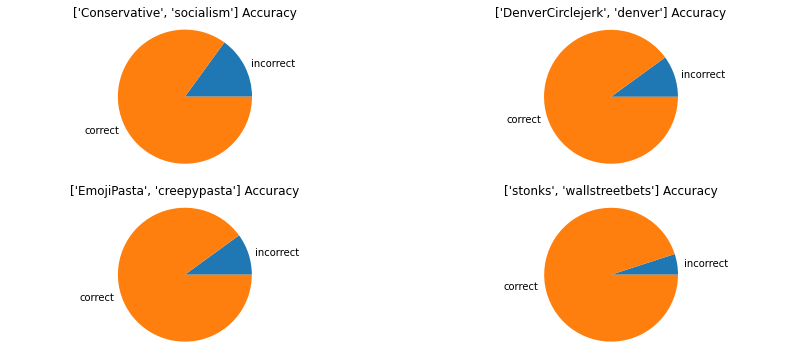

In [21]:
# pie charts showing accuracy

fig,ax=plt.subplots(2, int(len(subreddits)/2),figsize=(14,6),num=1)

# Plot subreddits[0] Accuracy
ax[0][0].pie([(1 - clf_accuracy[0]), clf_accuracy[0]], 
        labels=["incorrect", "correct"])
ax[0][0].set_title(f"{subreddits[0]} Accuracy")
ax[0][0].axis("equal")

# Plot subreddits[1] Accuracy
ax[0][1].pie([(1 - clf_accuracy[1]), clf_accuracy[1]], 
        labels=["incorrect", "correct"])
ax[0][1].set_title(f"{subreddits[1]} Accuracy")
ax[0][1].axis("equal")

# Plot subreddits[2] Accuracy
ax[1][0].pie([(1 - clf_accuracy[2]), clf_accuracy[2]], 
        labels=["incorrect", "correct"])
ax[1][0].set_title(f"{subreddits[2]} Accuracy")
ax[1][0].axis("equal")

# Plot subreddits[3] Accuracy
ax[1][1].pie([(1 - clf_accuracy[3]), clf_accuracy[3]], 
        labels=["incorrect", "correct"])
ax[1][1].set_title(f"{subreddits[3]} Accuracy")
ax[1][1].axis("equal")

plt.show()

### Sources:
https://towardsdatascience.com/how-to-vectorize-text-in-dataframes-for-nlp-tasks-3-simple-techniques-82925a5600db